# A. Introduction

We will go through the automobile dataset and perform EDA. We will draw insights using pandas, numpy, scipy and seaborn.

We will make our observations. We will also make and accept or reject hypotheses as we go along.

The preliminary goals of this analysis is to check which variables of the dataset can be used as good markers of pricing. The target end-users of this analysis are the Business Development heads who can use this to better position the product with respect to their competitor brands in the segment.

# B. Installing packages and loading the dataset

In [1]:
#install specific version of libraries used in lab
!pip install pandas
!pip install numpy
!pip install scipy
!pip install seaborn

import os
for dirname, _, filenames in os.walk('/kaggle/input/testdataset/automobile.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# C. Now we explore the data

### Steps:

#### 1. We will use pandas dataframes and numpy to manipulate data into a suitable form.

#### 2. We'll see if theres any variable-price pairs with a high Pearson correlation coefficient using the scipy package.

#### 3. We will later perform a p-value check for the previously obtained correlation values (which measures repeatability of the correlation coefficients). 
**Intuition:** If we say, the p-value of the hypothesis (in this instance, the coorelation measure) is 0.05, it means the following. When we repeat an experiment with various samples of the same groups, on an average, we should get get the sample correlation values which are close or equal to the population correlation 95% of the time and only 5% of the time, drastically different. In other words, if we perform this experiment for a number of samples, how likely are we to get a result that's closer to the average?
Its a statistical measure of the chance or luck factor which may produce a favorable result to the initial hypothesis thats alternate to the null hypothsis.Check [here](https://www.youtube.com/watch?v=vemZtEM63GY) and [here](https://youtu.be/4XfTpkGe1Kc) for more info.

* **Watch Out!** Low-p-values for **false positives** are possible. This is why we need **repeatability** in experiments to see if our variable (for eg, a newly invented drug or engine-location) proves to be statistically significant enough to be declared as influential.

#### 4. We will see how to group data-points using our varuiables. This will enable us to perform one-way ANOVA tests.

#### 5. Perform a one-way ANOVA test between various groups of the same variable 
 
 This will help us extract those variables for checking the statistical significance of such a correlation.

We'll use ```df.corr()``` to identify these variable pairs.


# C.1. We will use pandas dataframes to manipulate data into a suitable form

Theres 3 types of variables in these dataframes - **int64, float and object.**.

Here, the object type variables are of the categorical and nominal variety. We will visualize their distribution with boxplots.
The numerical (and hence continuous) variables here of the int64 and float types. We will visualize them using seaborn scatterplots.

In [2]:
# list the data types for each column
path="/kaggle/input/testdataset/automobile.csv"
df = pd.read_csv(path)
df.head()
typeinfo = pd.DataFrame(df.dtypes)

In [3]:
typeinfo

,0
symboling,int64
normalized-losses,int64
make,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64
length,float64


In [4]:
df.describe() #--------------only numeric (float, int64) variables are considered
df.describe(include='all')

#uncomment below line to get a statistical summary of the numeric dtypes
df.describe(include=['float', 'int64'])

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


Now we use ```df[[]].corr()``` to see the correlation table for different variables.
* A higher corr between two variables indicates that theres a strong linear relationship between the variables.

In [5]:
corr_df = df[['bore','stroke','compression-ratio','horsepower', 'engine-size', 'peak-rpm','price']].corr()

In [6]:
'''
for i, j in corr_df:
    if abs (corr_df[[i, j]]) >= 0.6:
        print("Variables with a high correlation coeff:", i, j)


corr_df[['bore','stroke']]
'''

'\nfor i, j in corr_df:\n    if abs (corr_df[[i, j]]) >= 0.6:\n        print("Variables with a high correlation coeff:", i, j)\n\n\ncorr_df[[\'bore\',\'stroke\']]\n'

# **D. Visualizations**

### ***1. Scatter plots***
Now we use```sns.regplot(x='', y ='', data = df)``` to see the scatter and visualize the distribultion of variables with respect to the price variable.

 **Intution:** Tighter scatters mean a higher statistical significance and consequently, higher confidence levels in the correlation coefficient. 
* A 0.05 p-value or a 95% confidence interval means, if we sample data points randomly we can say, 95% of the time, the regression line (average) will fall within the range of these samples. Refer ```engine-size``` vs ```price``` scatter below.


### ***2. Box and whisker plots***

Box and whisker plots give us a 5-number summary: **mean, IQR, 25th percentile, 75th percentile, min and max.**
We can **visualize the spread of the data** for each variable aginst the price variable. We can also visualize the one-way ANOVA by using these plots.

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


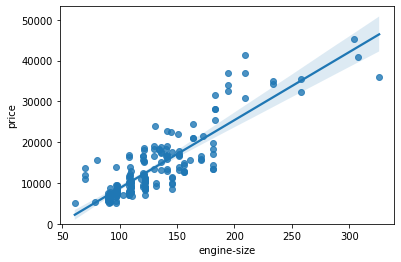

In [7]:
sns.regplot(x = "engine-size", y = "price", data=df)
plt.ylim(0,)
df[["engine-size", "price"]].corr()

> *engine-size and price* have a strong, positive correlation.

> Possible indicator of price

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


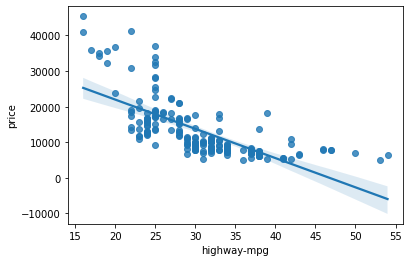

In [8]:
sns.regplot(x="highway-mpg", y="price", data=df)
df[['highway-mpg','price']].corr()

> *highway-mpg and price* have a strong, negative correlation

> Possible price indicator

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


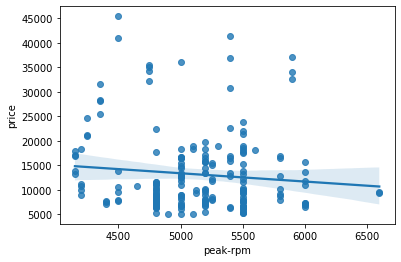

In [9]:
sns.regplot(x="peak-rpm", y="price", data=df)
df[['peak-rpm','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


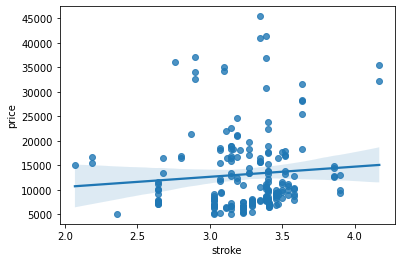

In [10]:
sns.regplot(x="stroke", y="price", data=df)
df[["stroke","price"]].corr()

> *stroke and price* are positively and weakly correlated

<AxesSubplot:xlabel='body-style', ylabel='price'>

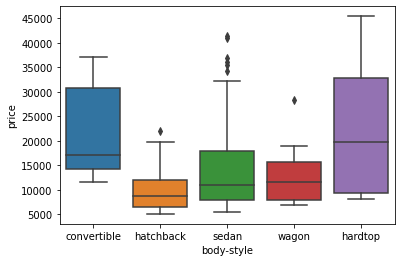

In [11]:
sns.boxplot(x="body-style", y="price", data=df)

> *body-styles* have a significant overlap in their price distributions, so its a bad price-indicator

<AxesSubplot:xlabel='engine-location', ylabel='price'>

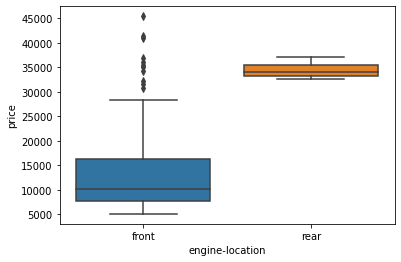

In [12]:
sns.boxplot(x="engine-location", y="price", data=df)

> *engine-location* groups have a significant demarcation in their price distributions. So this could be a potential price indicator.
> We explore further.

In [13]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


> We now see that *engine-location* is a bad price indicator. The distribution is obviously skewed and there arent enough obserbations in *rear* group for us to draw any useful conclusions. (refer p-value and repeatability)

> 

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

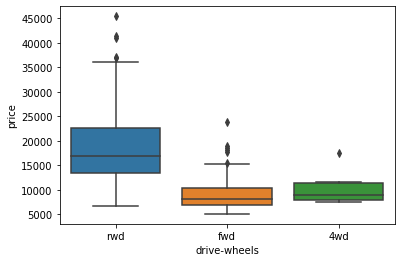

In [14]:
sns.boxplot(x="drive-wheels", y="price", data=df)
#Refer to ANOVA below

In [15]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


### Grouping basics

The "groupby" method groups data by different different categorial variables.
For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.

In [16]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

If we want to know, on average, which type of drive wheel is most valuable, we can group ```drive-wheels``` based on a variable, let's say, ```body-style``` and then average them.

We can select the columns ```drive-wheels```, ``` body-style``` and ```price```, then assign it to the variable "df_group_one".

In [17]:
df_group_one = df[['drive-wheels','body-style','price']]

df_group_body_style = df_group_one.groupby(['body-style'],as_index=True).mean()
df_group_body_style

,price
body-style,
convertible,21890.500000
hardtop,22208.500000
hatchback,9957.441176
sedan,14459.755319
wagon,12371.960000


In [18]:
# grouping results
df_group_drive_wheels = df_group_one.groupby(['drive-wheels'],as_index=True).mean()
df_group_drive_wheels

,price
drive-wheels,
4wd,10241.000000
fwd,9244.779661
rwd,19757.613333


Pivot tables are useful to see the grouped data.

In [19]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index= False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [20]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style').fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [21]:
df_body = df[["body-style", 'drive-wheels', "price"]]

df_body = df_body.groupby(["body-style", 'drive-wheels'], as_index = 0).mean()

df_body_pivot = df_body.pivot(index='body-style', columns='drive-wheels').fillna(0)
df_body_pivot


price                            
drive-wheels           4wd           fwd           rwd
body-style                                            
convertible       0.000000  11595.000000  23949.600000
hardtop           0.000000   8249.000000  24202.714286
hatchback      7603.000000   8396.387755  14337.777778
sedan         12647.333333   9811.800000  21711.833333
wagon          9095.750000   9997.333333  16994.222222

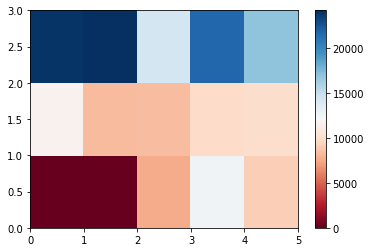

In [22]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()



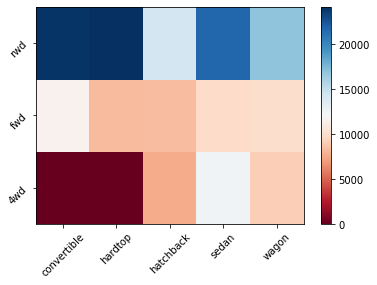

In [23]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=45)
plt.yticks(rotation=45)

fig.colorbar(im)
plt.show()

In [24]:
from scipy import stats

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


<AxesSubplot:xlabel='wheel-base', ylabel='price'>

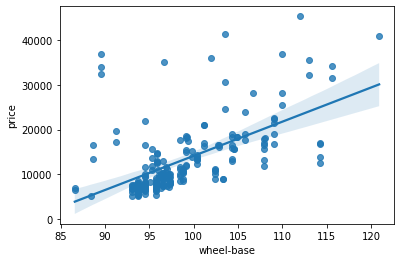

In [25]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

sns.regplot(x=df['wheel-base'], y=df['price'])

In [26]:
df[['wheel-base', 'price']].corr()

,wheel-base,price
wheel-base,1.000000,0.584642
price,0.584642,1.000000


In [27]:
df_gptest[['drive-wheels', 'price']]

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
...,...,...
196,rwd,16845.0
197,rwd,19045.0
198,rwd,21485.0
199,rwd,22470.0


In [28]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(  )

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [29]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

# E. Inferences

We will now explore the previously drawn inferences and check against our hypotheses.




# F. Conclusions